# Lecture examples

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import datasets, decomposition

In [57]:
data = pd.read_csv('heart.csv')

In [58]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Text(0.5, 1.0, 'Count of patients by age')

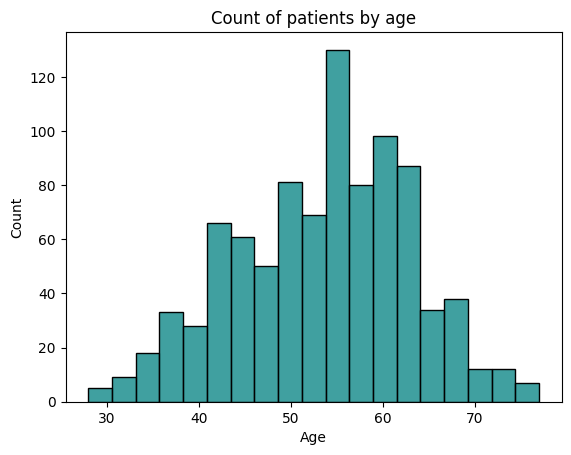

In [59]:
sns.histplot(data, x='Age', color='teal').set_title('Count of patients by age')

Text(0.5, 1.0, 'Count of patients by gender')

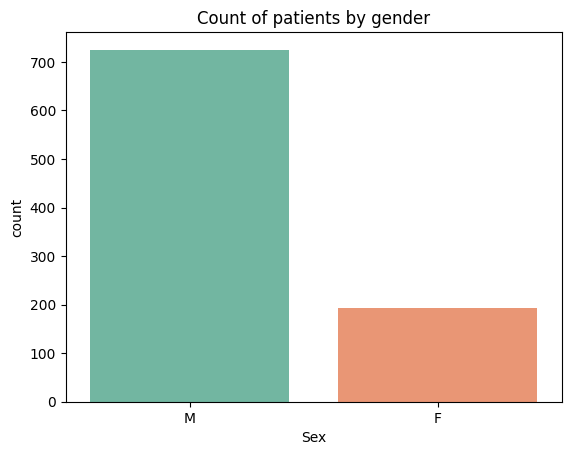

In [60]:
sns.countplot(data, x='Sex', hue='Sex', palette='Set2').set_title('Count of patients by gender')

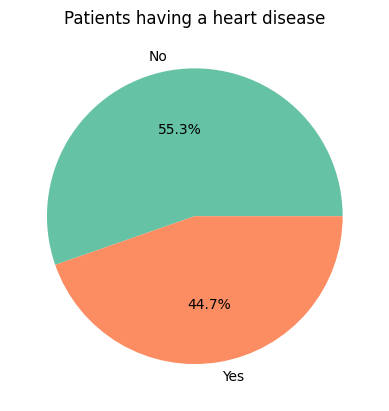

In [61]:
x = data['HeartDisease'].value_counts()

colors = sns.color_palette("Set2")

plt.pie(x.values,
        labels=['No', 'Yes'],
        labeldistance=1.1,
        autopct='%1.1f%%',
        colors=colors)

plt.title("Patients having a heart disease")

plt.show()

Text(0.5, 1.0, 'Heart Disease vs Cholesterol')

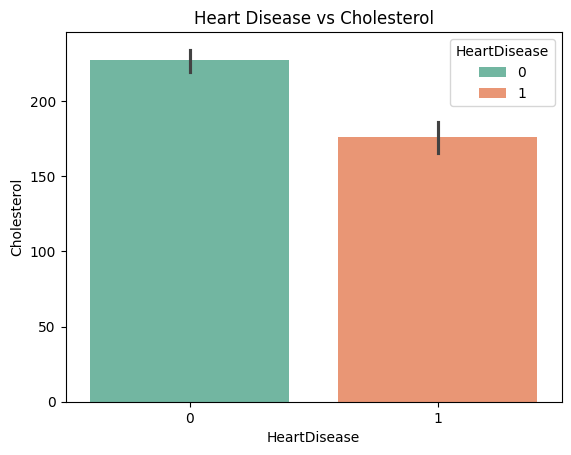

In [62]:
sns.barplot(data, x='HeartDisease', y='Cholesterol', hue='HeartDisease', palette='Set2').set_title('Heart Disease vs Cholesterol')

Text(0.5, 1.0, 'Age vs Cholesterol')

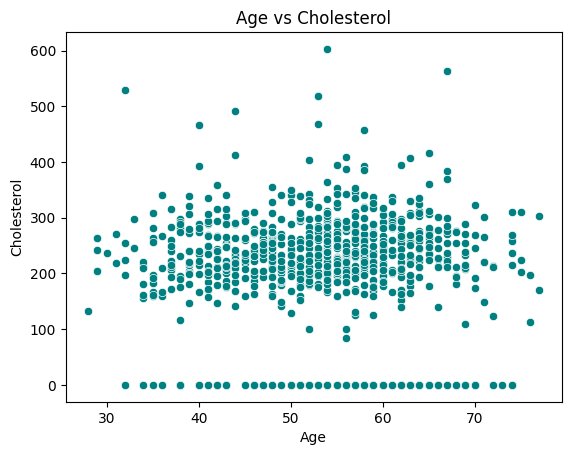

In [63]:
sns.scatterplot(data, x='Age', y='Cholesterol', color='teal').set_title('Age vs Cholesterol')

<Axes: xlabel='Sex', ylabel='count'>

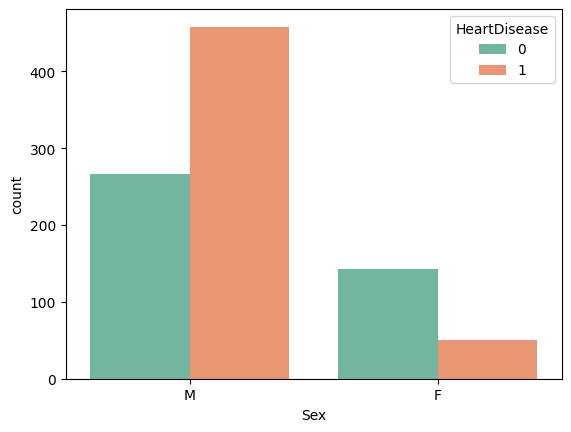

In [64]:
sns.countplot(data, x='Sex', hue='HeartDisease', palette='Set2')

In [65]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [66]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Text(0.5, 1.0, 'Iris features correlation')

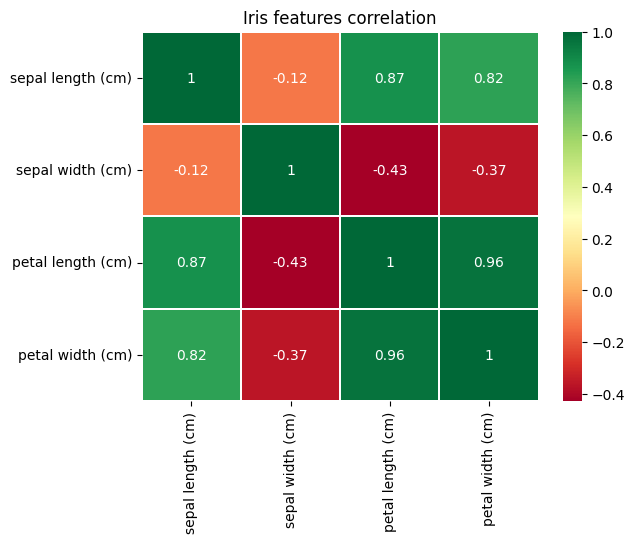

In [67]:
sns.heatmap(iris_df.drop(['target'],axis=1).corr(),annot=True,cmap='RdYlGn',linewidths=0.2).set_title('Iris features correlation')

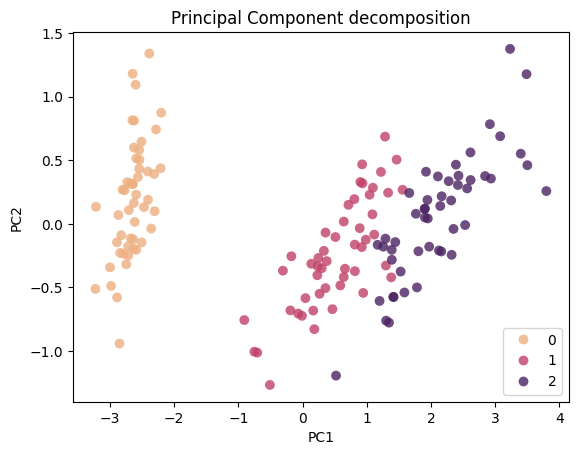

In [68]:
# divide datasets to features and labels
X = iris.data
y = iris.target

# define PCA
pca = decomposition.PCA(n_components=2)
X_tr = pca.fit_transform(X)

# visualize
ax = sns.scatterplot(x=X_tr[:, 0], y=X_tr[:, 1], hue=y, palette="flare",
                     s=50, linewidth=0, alpha=0.8)

ax.set(xlabel='PC1', ylabel='PC2')
plt.title('Principal Component decomposition')
plt.show()

([<matplotlib.axis.XTick at 0x7bdfc4410790>,
 [Text(0, 0, 'PC1'), Text(1, 0, 'PC2'), Text(2, 0, 'PC3'), Text(3, 0, 'PC4')])

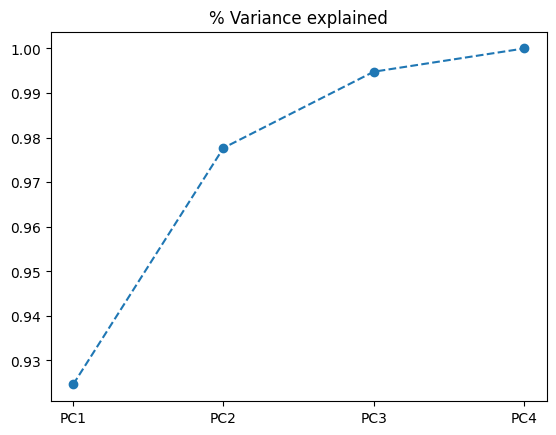

In [69]:
pca_full = decomposition.PCA(n_components=4)
X_full = pca_full.fit_transform(X)

plt.plot(pca_full.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('% Variance explained')
plt.xticks(np.arange(4), ['PC1', 'PC2', 'PC3', 'PC4'])

# Heart Failure Prediction Dataset in-depth analysis

## Introduction

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information

Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]




In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [52]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


1. **Numeric (Quantitative) Data**:
   - Age
   - RestingBP
   - Cholesterol
   - MaxHR
   - Oldpeak
   
2. **Categorical (Nominal) Data**:
   - Sex
   - ChestPainType
   - FastingBS
   - RestingECG
   - ExerciseAngina
   - ST_Slope
   - HeartDisease

3. **Binary Data**:
   - FastingBS
   - ExerciseAngina
   - HeartDisease


In [4]:
# checking for total null values

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Succesfully, our dataset doesn't have any null values!


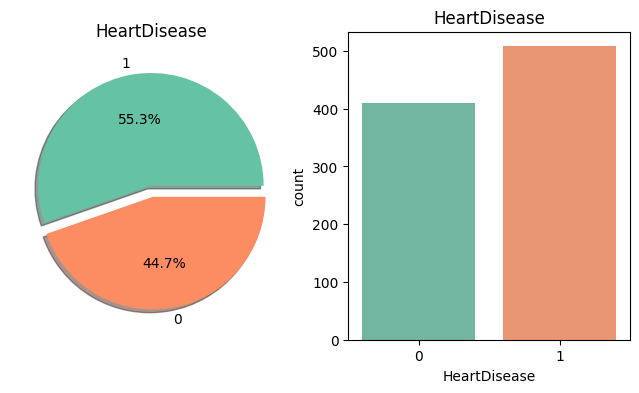

In [5]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(8, 4))

# Piechart for the first subplot
data['HeartDisease'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=sns.color_palette('Set2'))
ax[0].set_title('HeartDisease')
ax[0].set_ylabel('')

# Countplot for the second subplot
sns.countplot(data, x='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_title('HeartDisease')

plt.show()

The majority of represented patients have a heart diease. According to these plots, the number of patients being diagnosed with a heart disease is 500 +- 10 and the number of people not having similar medial conclusion is about 400. The more detailed analysis of this data is needed to understand, why do we need to work with "healthy" people.

## Feature types

1. **Categorical Features:**
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables. **Categorical Features in the dataset: Gender, Embarked.**

2. **Ordinal Features:**
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable. **Ordinal Features in the dataset: PClass**

3. **Continous Feature:**
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column. **Continous Features in the dataset: Age**

### Gender

In [6]:
#Sex -> categorical feature

pd.crosstab(data.Sex, data.HeartDisease, margins=True).style.background_gradient(cmap='summer_r')

HeartDisease,0,1,All
Sex,,,
F,143,50,193
M,267,458,725
All,410,508,918


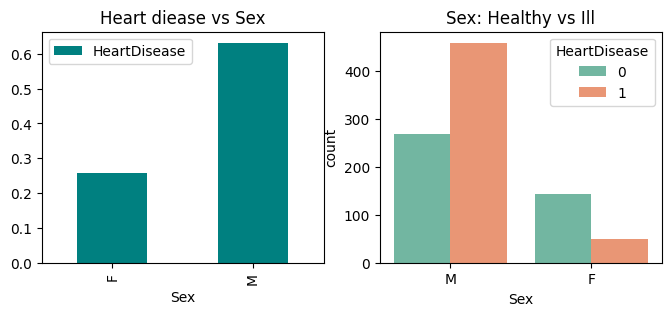

In [ ]:
f, ax=plt.subplots(1, 2, figsize=(8,3))

data[['Sex','HeartDisease']].groupby(['Sex']).mean().plot.bar(ax=ax[0], color='teal')
ax[0].set_title('Heart diease vs Sex')

sns.countplot(data, x='Sex',hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_title('Sex: Healthy vs Ill')

plt.show()

The amount of male patients is a lot bigger than amount of female patients. However, among men there are 63% of men having a heart disease and among women this value is only 26%. This is an important geature for modeling.

### ChestPainType

In [7]:
#Categorial non ordinal parameter
pd.crosstab(data.ChestPainType, data.HeartDisease, margins=True).style.background_gradient(cmap='summer_r')

HeartDisease,0,1,All
ChestPainType,,,
ASY,104,392,496
ATA,149,24,173
NAP,131,72,203
TA,26,20,46
All,410,508,918


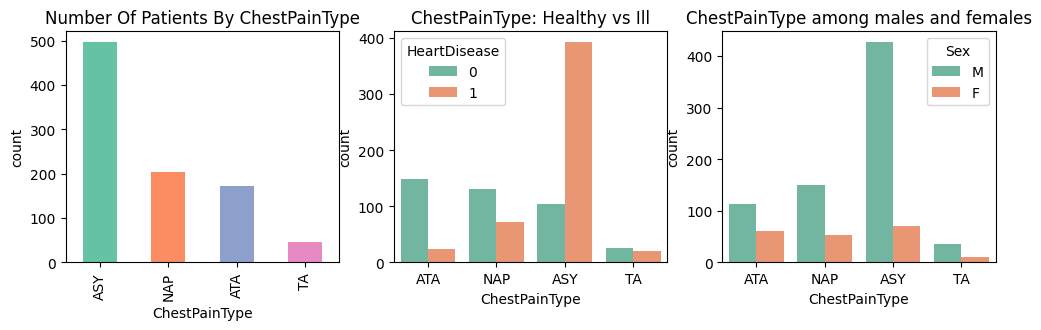

In [8]:
f, ax = plt.subplots(1, 3, figsize=(12,3))

data['ChestPainType'].value_counts().plot.bar(color=sns.color_palette('Set2'), ax=ax[0])
ax[0].set_title('Number Of Patients By ChestPainType')
ax[0].set_ylabel('count')

sns.countplot(data, x='ChestPainType', hue='HeartDisease', ax=ax[1], palette='Set2')
ax[1].set_title('ChestPainType: Healthy vs Ill')

sns.countplot(data, x='ChestPainType', hue='Sex', ax=ax[2], palette='Set2')
ax[2].set_title('ChestPainType among males and females')
ax[2].set_ylabel('count')
plt.show()

The ASY (Asymptomatic) chest pain type looks very broadly represented among men - more that 4 times more. This pain type is also associated with the heart disease the most, which can be related to the fact that it's common for men whos amount is bigger in this dataset.
Other chest pain types don't really correlate with the diagnosis of heart disease.


In [ ]:
pd.crosstab([data.Sex, data.HeartDisease], data.ChestPainType, margins=True).style.background_gradient(cmap='summer_r')

From this table we can also notice that among female having the ASY chest pain type those having a heart disease is 55%, wherease in other chest pain types the contribution is almost unnoticable. Thus, the ASY can be really predisposed in modeling because it contributes in the diagnosis in both genders.

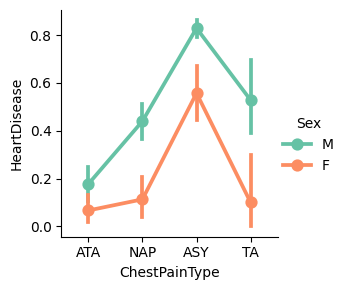

In [ ]:
sns.catplot(data, x='ChestPainType', y='HeartDisease', hue='Sex', palette='Set2',
            kind="point", height=3, aspect=1)

We use CatPlot in this case, because **it makes the seperation of categorical values easy**.

The catplot vilusalises the table described above.

### Age

In [ ]:
# Age -> continuous feature

print('Oldest Patient was of:',data['Age'].max(),'Years')
print('Youngest Patient was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Patient was of: 77 Years
Youngest Patient was of: 28 Years
Average Age on the ship: 53.510893246187365 Years


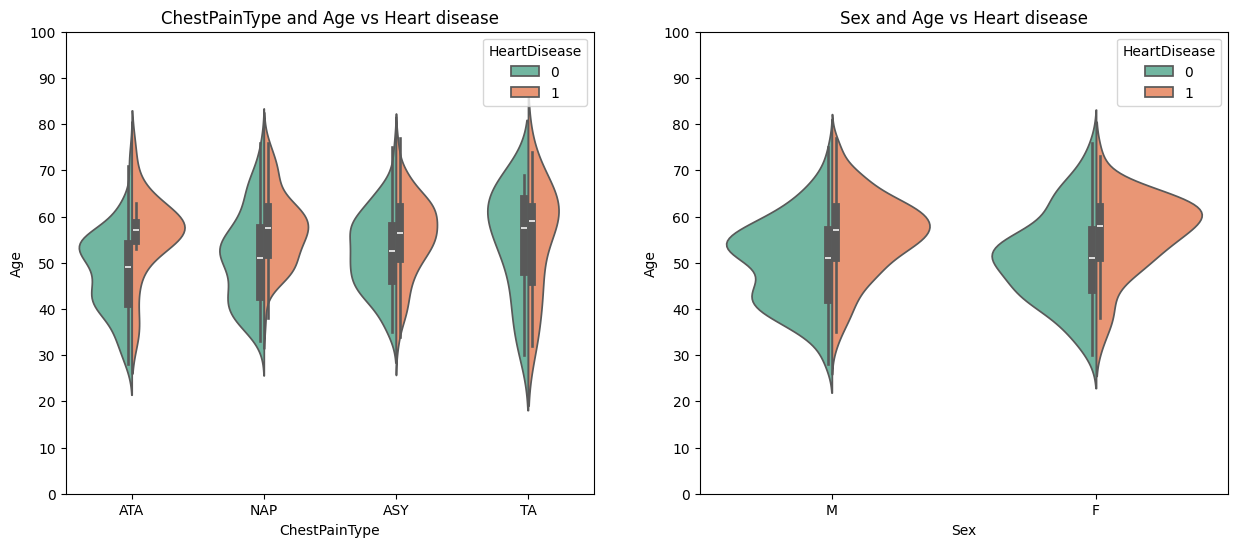

In [ ]:
f, ax=plt.subplots(1,2, figsize=(15,6))

sns.violinplot(data, x="ChestPainType", y="Age", hue="HeartDisease", split=True, ax=ax[0], palette="Set2")
ax[0].set_title('ChestPainType and Age vs Heart disease')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data, x="Sex", y="Age", hue="HeartDisease", split=True, ax=ax[1], palette="Set2")
ax[1].set_title('Sex and Age vs Heart disease')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

Observations so far:

1. In all chest pain types, age peak of patients diagnosed with a heart disease is ~ 60 years. The distribution of the NAP type is, however, a bit shifted to the older people.

2. According to the plot, there is no correlation between heart disease, sex and age - among either male of female patients the peak of people with a heart disease is stated at ~ 60 years.


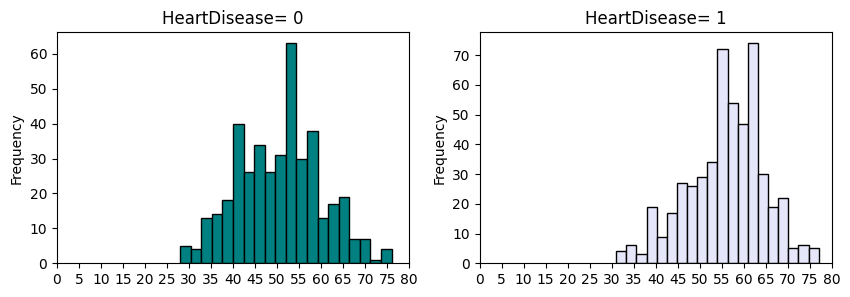

In [ ]:
f, ax=plt.subplots(1,2,figsize=(10,3))

data[data['HeartDisease']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='teal')
ax[0].set_title('HeartDisease= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['HeartDisease']==1].Age.plot.hist(ax=ax[1], color='lavender', bins=20, edgecolor='black')
ax[1].set_title('HeartDisease= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

Observations:
1. People aged below 30 don't get diagnosed with heart diseases (pleasant news for burntout 22 years old masters students).

2. People who usually visit a doctor concerned about their heart condition are usually aged in the diapasone from 40 to 60 with a peak on ~55.

3. There is a small fail of values among ill people, the peaks are at 55 to ~ 62 years, values in between are represented less.

### Embarked

In [ ]:
# RestingECG -> categorical value

pd.crosstab([data.ChestPainType, data.RestingECG],[data.Sex, data.HeartDisease], margins=True).style.background_gradient(cmap='summer_r')

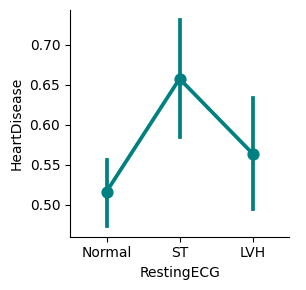

In [ ]:
sns.catplot(data, x='RestingECG', y='HeartDisease', kind='point',
            color='teal', height=3, aspect=1)

A bit obvious but the least possibility to observe a heart disease is in a patient without ACG alterations. The highest possibility is in the ST slope change. This plot doesn't correlate with the table because of amounts of patients.


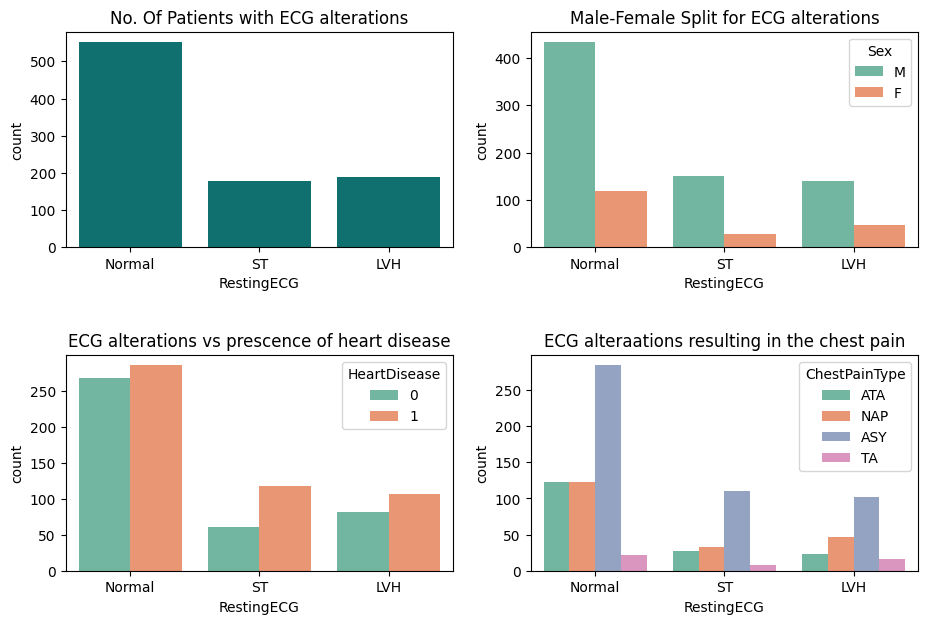

In [ ]:
f, ax=plt.subplots(2,2, figsize=(11,7))

sns.countplot(data, x='RestingECG', ax=ax[0,0], color='teal')
ax[0,0].set_title('No. Of Patients with ECG alterations')

sns.countplot(data, x='RestingECG',hue='Sex', ax=ax[0,1], palette='Set2')
ax[0,1].set_title('Male-Female Split for ECG alterations')

sns.countplot(data, x='RestingECG', hue='HeartDisease', ax=ax[1,0], palette='Set2')
ax[1,0].set_title('ECG alterations vs prescence of heart disease')

sns.countplot(data, x='RestingECG', hue='ChestPainType', ax=ax[1,1], palette='Set2')
ax[1,1].set_title('ECG alterations resulting in the chest pain')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

Observations:

1. Patients having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) show a higher value of heart disease in comparison to other types of ECG results presented in the dataset.
2. The chest pain type does not correlate with any certain ECG conditions.

Text(0.5, 1.0, 'ST slope vs Heart disease')

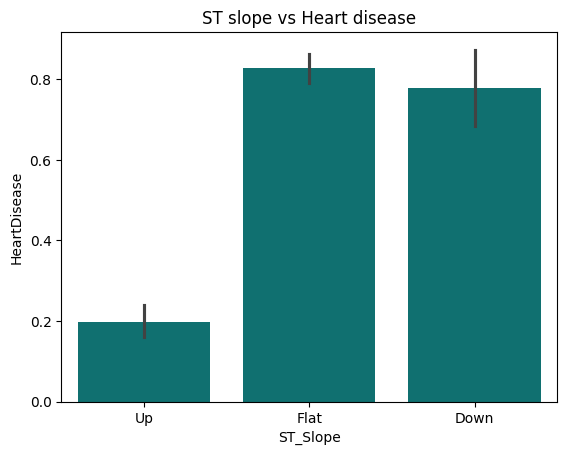

In [70]:
sns.barplot(data, x='ST_Slope', y='HeartDisease', color='teal').set_title('ST slope vs Heart disease')

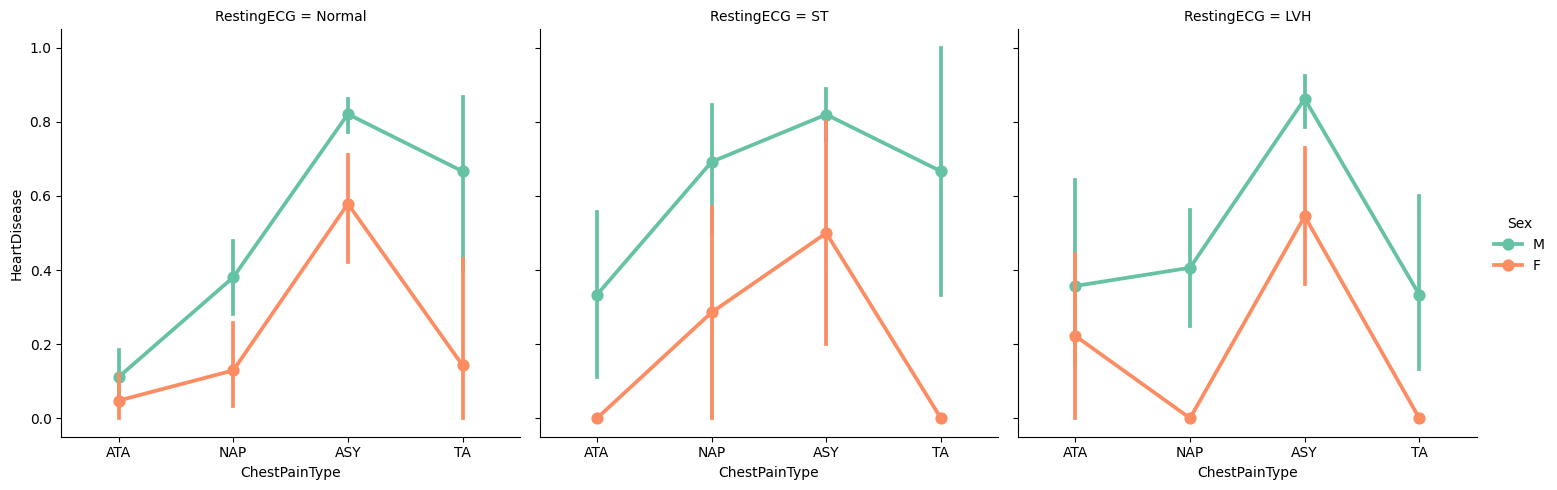

In [ ]:
sns.catplot(data, x='ChestPainType', y='HeartDisease', hue='Sex', col='RestingECG', kind='point', palette='Set2')

Observations:

1. The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2. Port S looks to be very unlucky for Pclass3 passengers as the survival rate for both men and women is very low.

3. Port Q looks looks to be the most unlucky one for men, as almost all were from Pclass 3.

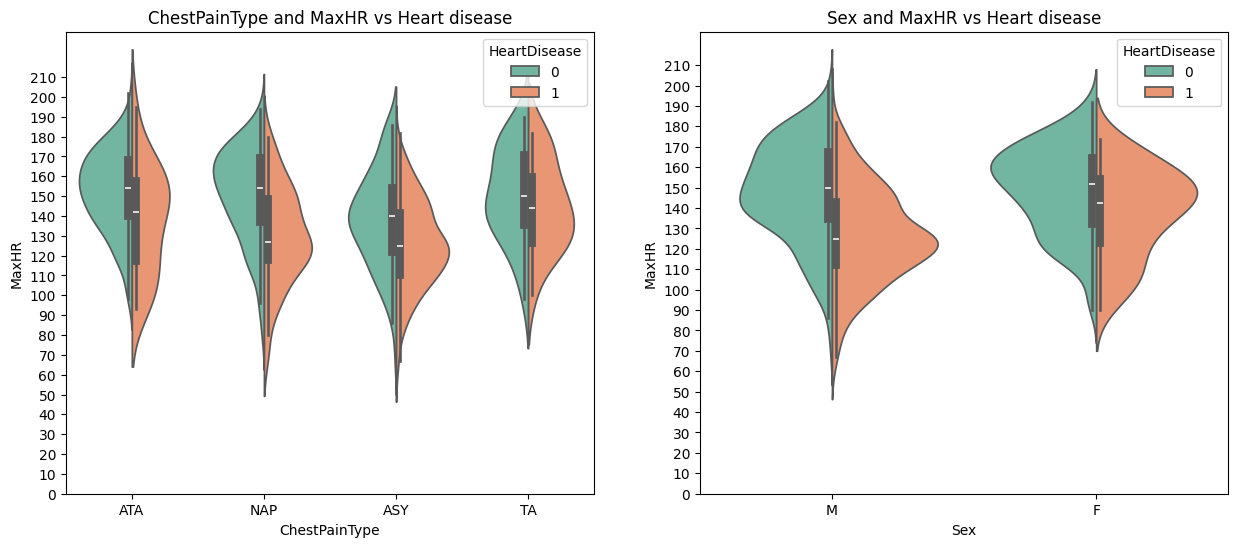

In [72]:
f, ax=plt.subplots(1,2, figsize=(15,6))

sns.violinplot(data, x="ChestPainType", y="MaxHR", hue="HeartDisease", split=True, ax=ax[0], palette="Set2")
ax[0].set_title('ChestPainType and MaxHR vs Heart disease')
ax[0].set_yticks(range(0, 220, 10))

sns.violinplot(data, x="Sex", y="MaxHR", hue="HeartDisease", split=True, ax=ax[1], palette="Set2")
ax[1].set_title('Sex and MaxHR vs Heart disease')
ax[1].set_yticks(range(0, 220, 10))

plt.show()

Observations:

1. The heart value is obsevred to have a good correlation with a heart disease risks not depending on the chest pain type.

2. Women have a more high MaxHR value both in healthy and ill groups than men.

In [10]:
# FastingBS -> discrete value

pd.crosstab([data.FastingBS],data.HeartDisease).style.background_gradient(cmap='summer_r')

HeartDisease,0,1
FastingBS,,
0,366,338
1,44,170


In [ ]:
pd.crosstab(data.ChestPainType,data.ExerciseAngina).style.background_gradient(cmap='summer_r')

ExerciseAngina,N,Y
ChestPainType,,
ASY,199,297
ATA,156,17
NAP,152,51
TA,40,6


Observations:

ASY type of chest pain, being the most popular in our dataset, can't be associated with exercise angina.
However, two other types - ATA and NAP - can be.

### Fare

In [ ]:
# Fare -> continous feature

print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


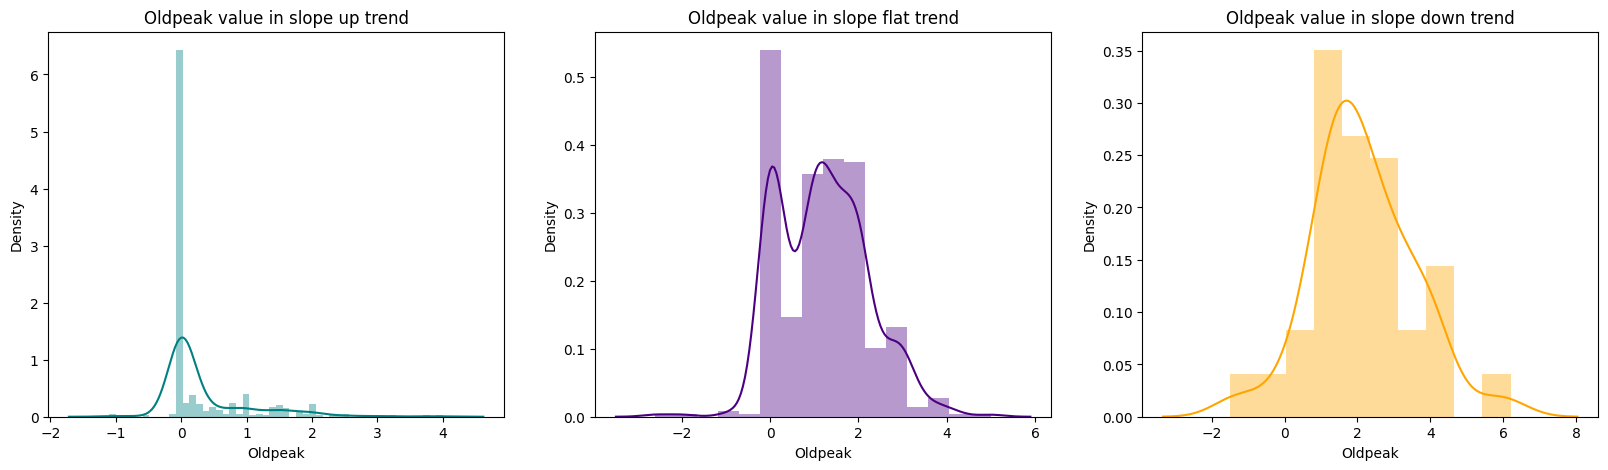

In [18]:
f, ax = plt.subplots(1,3, figsize=(20,5))

sns.distplot(data[data['ST_Slope']=='Up'].Oldpeak, ax=ax[0], color='teal')
ax[0].set_title('Oldpeak value in slope up trend')

sns.distplot(data[data['ST_Slope']=='Flat'].Oldpeak, ax=ax[1], color='indigo')
ax[1].set_title('Oldpeak value in slope flat trend')

sns.distplot(data[data['ST_Slope']=='Down'].Oldpeak, ax=ax[2], color='orange')
ax[2].set_title('Oldpeak value in slope down trend')

plt.show()

The distributions in groups of flat and down ST slope have similar spread, but in the group of up st slope trend the value is very confident.

**Observations in a Nutshell for all features:**

1. **Gender:** The chance of getting a heart disease doesn't match with a certain gener.

2. **ChestPainType** also we cannot rely on this parameter and make any conclusions because the prevalance of a certain chest pain type is indicated due to men.

3. **Age:** Ahe has a normal distribution among the groups of healthy and ill people, so no certain correlation can either be estimated.

4. **RestingECG:** This is a very interesting feature. It correlated with further estimation of the ST slope and oldpeak, and here we can see a good correlation between a certain ECG pattern and heart disease. Also in this case, some sex-related observations are made - in a certain type of resting ECG (ST) we can see that if a male patient has a TA type of pain he is calculated to be more possible to gain a heart disease that a women.  

### Correlations (heatmap)

<Axes: >

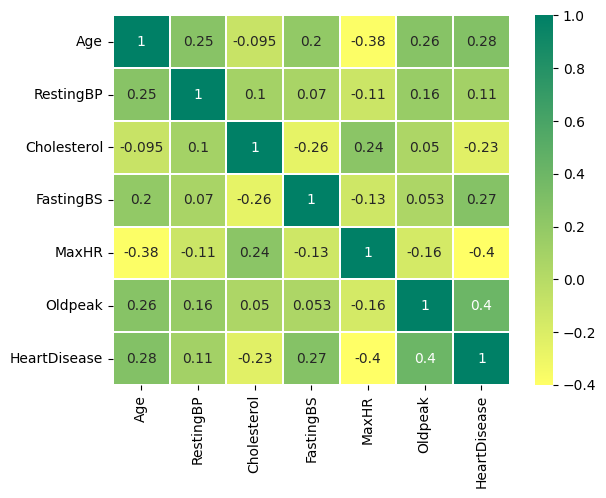

In [24]:
data_corr = data.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)

sns.heatmap(data_corr.corr(), annot=True, cmap='summer_r', linewidths=0.2)

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

The best correlation is observed between the diagnosis of heart disease and the oldpeak values. A good value of negative correlation is observed between age and MaxHR.


## Feature engineering and Data cleaning

Whenever we are given a dataset with features, **it is not necessary that all the features will be important**. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for further predictive modeling.

### Age band

**Problem With Age Feature:**

Age is a continous feature, there is a certain problem with continous variables in Machine Learning models.

Eg: We can group or arrange Person by gender, but how to group them by their Age? If there are 30 persons, there may be 30 age values. Now this is problematic.

We need to **convert these continous values into categorical values**. We can using **binning** i.e group a range of ages into a single bin or assign them a single value.

The maximum age of a passenger was 80. Let's divide the range from 0-80 into 5 bins -> 80/5 = 16 -> bins of size 16.

In [25]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_band
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,3


In [26]:
# checking the number of patients in each band

data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
3,545
2,258
4,103
1,12


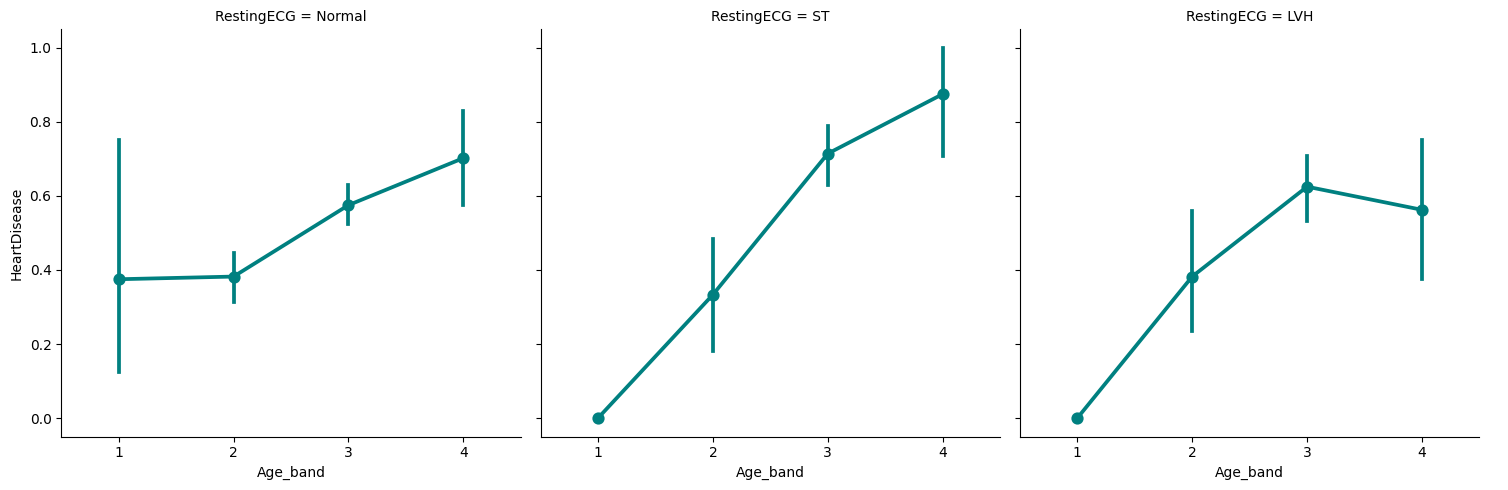

In [27]:
sns.catplot(data, x='Age_band', y='HeartDisease', col='RestingECG', kind='point', color='teal')

### Cholesterol Range

In [28]:
data['Cholesterol_range'] = pd.qcut(data['Cholesterol'], 4)
data.groupby(['Cholesterol_range'])['HeartDisease'].mean().to_frame().style.background_gradient(cmap='summer_r')

,HeartDisease
Cholesterol_range,
"(-0.001, 173.25]",0.778261
"(173.25, 223.0]",0.407563
"(223.0, 267.0]",0.479821
"(267.0, 603.0]",0.550661


In [29]:
data['Cholesterol_cat'] = 0
data.loc[data['Cholesterol']<=173.25,'Cholesterol_cat']=0
data.loc[(data['Cholesterol']>173.25)&(data['Cholesterol']<=223.0),'Cholesterol_cat']=1
data.loc[(data['Cholesterol']>223.0)&(data['Cholesterol']<=267.0),'Cholesterol_cat']=2
data.loc[(data['Cholesterol']>267.0)&(data['Cholesterol']<=603.0),'Cholesterol_cat']=3

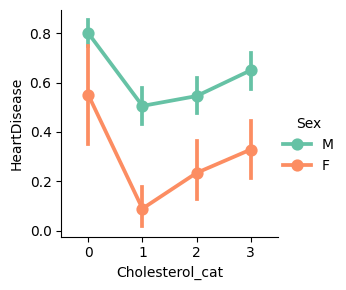

In [30]:
sns.catplot(data, x='Cholesterol_cat', y='HeartDisease', hue='Sex', kind='point', palette='Set2', height=3)

Overall, the hear diease possibility increases linearly with the increase of cholesterol. But interestingly the first interval is mostly associated with heart diseases.

### Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, we need to convert features loke Gender, Embarked, etc into numeric values

In [39]:
data['Sex'].replace(['M','F'], [0,1], inplace=True)
data['ChestPainType'].replace(['ASY','ATA','NAP', 'TA'], [0,1,2,3], inplace=True)
data['RestingECG'].replace(['Normal','ST','LVH'], [0,1,2], inplace=True)
data['ExerciseAngina'].replace(['N','Y'], [0,1], inplace=True)
data['ST_Slope'].replace(['Up','Flat','Down'], [0,1,2], inplace=True)
data['Age_band'] = data['Age_band'].astype(float)
data['Cholesterol_cat'] = data['Cholesterol_cat'].astype(float)

### Dropping Features

<Axes: xlabel='Oldpeak', ylabel='Count'>

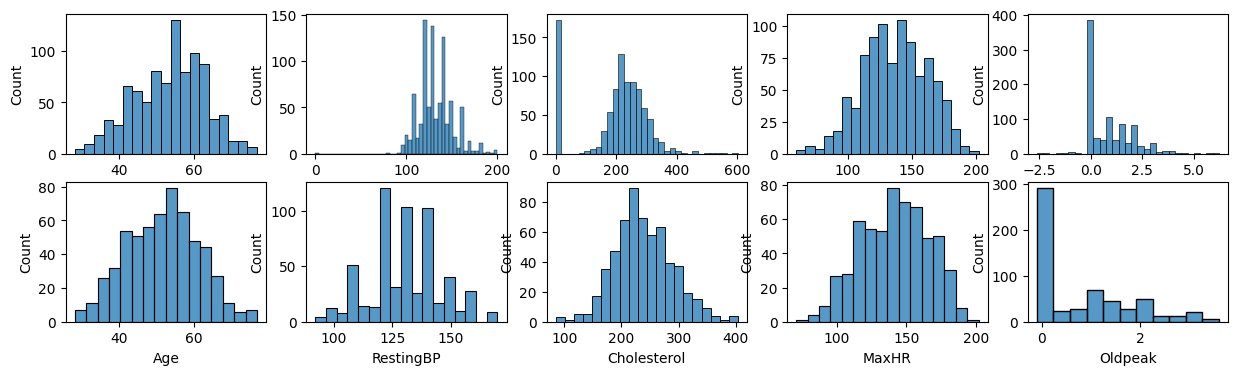

In [73]:
no_out = data.copy()
num_cols = no_out.select_dtypes(include=[np.number]).columns
iqr = no_out[num_cols].apply(lambda col: col.quantile(0.75) - col.quantile(0.25))

# Define the lower and upper bounds
lower = iqr * 1.5
upper = iqr * 1.5

# Create boolean masks for outlier rows
outs = []
for col in num_cols:
    outs.append((no_out[col] < (no_out[col].quantile(0.25) - lower[col])) | (no_out[col] > (no_out[col].quantile(0.75) + upper[col])))

# Combine the boolean masks into a single mask
outlier_mask = pd.concat(outs, axis=1).any(axis=1)

# Drop the outlier rows
no_out = no_out[~outlier_mask]
fig, axes = plt.subplots(2, 5, figsize=(15, 4))

# create chart in each subplot
sns.histplot(data, x="Age", ax=axes[0, 0])
sns.histplot(data, x="RestingBP", ax=axes[0, 1])
sns.histplot(data, x="Cholesterol", ax=axes[0, 2])
sns.histplot(data, x="MaxHR", ax=axes[0, 3])
sns.histplot(data, x="Oldpeak", ax=axes[0, 4])

sns.histplot(no_out, x="Age", ax=axes[1, 0])
sns.histplot(no_out, x="RestingBP", ax=axes[1, 1])
sns.histplot(no_out, x="Cholesterol", ax=axes[1, 2])
sns.histplot(no_out, x="MaxHR", ax=axes[1, 3])
sns.histplot(no_out, x="Oldpeak", ax=axes[1, 4])

